## Import Libraries

In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
#from mplsoccer import Pitch
from mplsoccer import VerticalPitch,Pitch
from mplsoccer.pitch import Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import plotly.graph_objects as go
import math

pd.set_option("display.max_columns", None)

### Euro 2024 Competition

In [2]:
#call the statsbombpy API to get a list of matches for a given competition
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

#print the first 5 matches listed
euro_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,available,2024-07-15T07:54:23.583297,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,available,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,available,2024-07-10T08:51:07.032303,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,available,2024-07-10T06:50:04.068615,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,available,2024-07-12T01:57:15.210934,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


## ETL

In [3]:
#concat home and away teams to keep the unique teams that participated to the tournament
home_team = euro_2024_matches['home_team']
away_team = euro_2024_matches['away_team']
teams = pd.concat([home_team,away_team])
teams = pd.DataFrame(teams.drop_duplicates()).reset_index(drop=True)
teams.columns = ['Team']

In [4]:
# give teams colors for the visuals
team_colors = pd.read_excel('Team Colors.xlsx')
teams = teams.merge(team_colors, how='inner', on='Team')

In [5]:
teams.head()

,Team,First_Color,Second_Color
0,Netherlands,#F36C21,#FFFFFF
1,Spain,#8B0D11,#FCB507
2,Portugal,#E42518,#0D6938
3,Denmark,#FCB507,#FFFFFF
4,England,#000040,#FFFFFF


In [6]:
# take all matches in one dataframe
matches = euro_2024_matches.filter(['match_id','match_date','home_team','away_team','competition_stage','home_score','away_score','period'])
matches['match'] = matches['competition_stage'] + ' ' + matches['home_team'] + ' - ' + matches['away_team'] 

In [7]:
matches

,match_id,match_date,home_team,away_team,competition_stage,home_score,away_score,match
0,3942819,2024-07-10,Netherlands,England,Semi-finals,1,2,Semi-finals Netherlands - England
1,3943043,2024-07-14,Spain,England,Final,2,1,Final Spain - England
2,3942752,2024-07-09,Spain,France,Semi-finals,2,1,Semi-finals Spain - France
3,3942382,2024-07-06,Netherlands,Turkey,Quarter-finals,2,1,Quarter-finals Netherlands - Turkey
4,3942349,2024-07-05,Portugal,France,Quarter-finals,0,0,Quarter-finals Portugal - France
5,3930180,2024-06-25,Netherlands,Austria,Group Stage,2,3,Group Stage Netherlands - Austria
6,3930171,2024-06-20,Denmark,England,Group Stage,1,1,Group Stage Denmark - England
7,3942227,2024-07-06,England,Switzerland,Quarter-finals,1,1,Quarter-finals England - Switzerland
8,3942226,2024-07-05,Spain,Germany,Quarter-finals,2,1,Quarter-finals Spain - Germany
9,3938645,2024-06-26,Ukraine,Belgium,Group Stage,0,0,Group Stage Ukraine - Belgium


In [8]:
# functions fore retreiving match data

# retrieve the prefered Match ID
def take_matchid(df, value):
    match = df[df['match'] == value]
    if not match.empty:
        return match['match_id'].iloc[0]
    else:
        return None  # or handle it as you need

# select the match that you want 
def teams_selected(df,value):
    df_details = df[df.match == value]
    return df_details

In [9]:
# choose a match from table (matches) and column (match)
match_selector = 'Final Spain - England'

In [10]:
# call the statsbombpy events API to bring in the event data for the match using the function and the string match_selector
match = sb.events(match_id=take_matchid(matches,match_selector))

In [11]:
match.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50aa204f-5d65-4145-8597-5d5628fb7898,1,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a279cbee-9ab3-4cfb-9c51-27cacc1bf2a2,2,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d2126e70-9f04-4bb7-ba2b-9377836d1757,3,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[54d78bfa-4146-42bd-acdc-97bcd393dd81],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54d78bfa-4146-42bd-acdc-97bcd393dd81,4,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[d2126e70-9f04-4bb7-ba2b-9377836d1757],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7230470a-8ceb-4eb8-a66f-d72a2afb12d6,1706,NaN,NaN,NaN,3943043,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Regular Play,NaN,NaN,NaN,79,Spain,772,[cb9ba06c-a673-448d-ab21-755d330fcadc],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [12]:
# retieve the general info of the match using again the other function and the match selector
match_details = teams_selected(matches,match_selector)

In [13]:
match_details

,match_id,match_date,home_team,away_team,competition_stage,home_score,away_score,match
1,3943043,2024-07-14,Spain,England,Final,2,1,Final Spain - England


In [14]:
match_shots = match[(match['type'] == 'Shot') & (match['period'] < 5)]

In [15]:
most_shots = pd.DataFrame(match_shots.groupby('player')['type'].count().sort_values(ascending=False))
most_shots = most_shots.reset_index() 

In [16]:
most_shots

,player,type
0,Declan Rice,3
1,Álvaro Borja Morata Martín,3
2,Nicholas Williams Arthuer,3
3,Lamine Yamal Nasraoui Ebana,2
4,Mikel Oyarzabal Ugarte,2
5,Fabián Ruiz Peña,2
6,Daniel Olmo Carvajal,2
7,Jude Bellingham,1
8,Harry Kane,1
9,Aymeric Laporte,1


In [17]:
most_xg = pd.DataFrame(match_shots.groupby('player')['shot_statsbomb_xg'].sum().sort_values(ascending=False))
most_xg = most_xg.reset_index() 
most_xg = most_xg[most_xg.shot_statsbomb_xg > 0]

In [18]:
most_xg

,player,shot_statsbomb_xg
0,Álvaro Borja Morata Martín,0.346755
1,Lamine Yamal Nasraoui Ebana,0.326063
2,Mikel Oyarzabal Ugarte,0.321036
3,Daniel Olmo Carvajal,0.272128
4,Nicholas Williams Arthuer,0.229644
5,Declan Rice,0.212219
6,Phil Foden,0.179694
7,Robin Aime Robert Le Normand,0.117465
8,Marc Guehi,0.117154
9,Aymeric Laporte,0.097933


In [19]:
most_shots_player = match_shots[match_shots.player == str(most_xg['player'].iloc[0])]

In [20]:
most_shots_player = most_shots_player.reset_index()

In [21]:
most_shots_player_loc = pd.DataFrame(most_shots_player.location.to_list(), columns=['x', 'y'])

In [22]:
most_shots_player_loc

,x,y
0,113.9,30.2
1,95.8,46.1
2,110.9,51.0


In [23]:
# put the columns into dataframe
most_shots_player['x'] = most_shots_player_loc['x']
most_shots_player['y'] = most_shots_player_loc['y']
most_shots_player.head()

,level_0,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x,y
0,3233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927d5ca-c7c1-4296-81a6-41e7f28cbfbd,1639,NaN,NaN,"[113.9, 30.2]",3943043,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,Álvaro Borja Morata Martín,3477.0,Center Forward,69,Spain,772,"[89afe690-f727-401b-9500-c0ccca944bae, eea5623...",24,NaN,Right Foot,NaN,"[114.3, 30.9]",True,"[{'location': [93.9, 16.7], 'player': {'id': 6...",NaN,NaN,Blocked,0.078360,Normal,Open Play,NaN,NaN,NaN,NaN,NaN,Spain,772,00:42:24.429,Shot,NaN,113.9,30.2
1,3238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02c1f765-7ef5-4262-8ba9-91460f91d317,2100,NaN,NaN,"[95.8, 46.1]",3943043,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Free Kick,Álvaro Borja Morata Martín,3477.0,Center Forward,91,Spain,772,"[22b5f2af-1b0a-43c2-a65f-53f9b05f152c, 88081da...",15,NaN,Left Foot,NaN,"[97.1, 45.8]",NaN,"[{'location': [100.1, 21.9], 'player': {'id': ...",b022f182-9ab9-41ff-b6f7-ac736f907176,NaN,Blocked,0.025289,Normal,Open Play,NaN,NaN,NaN,NaN,NaN,Spain,772,00:09:15.478,Shot,True,95.8,46.1
2,3239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.422174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c5c8b815-2869-4b45-ac6c-dfdad0b3d4c5,2131,NaN,NaN,"[110.9, 51.0]",3943043,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,Álvaro Borja Morata Martín,3477.0,Center Forward,92,Spain,772,[025c78cb-9a2d-46df-9a52-528ebc08d79d],58,NaN,Right Foot,NaN,"[115.5, 40.2]",True,"[{'location': [93.1, 60.6], 'player': {'id': 3...",c20626d0-8965-428d-9ed7-9c532393c9a9,NaN,Wayward,0.243106,Normal,Open Play,NaN,NaN,NaN,NaN,NaN,Spain,772,00:09:58.289,Shot,NaN,110.9,51.0


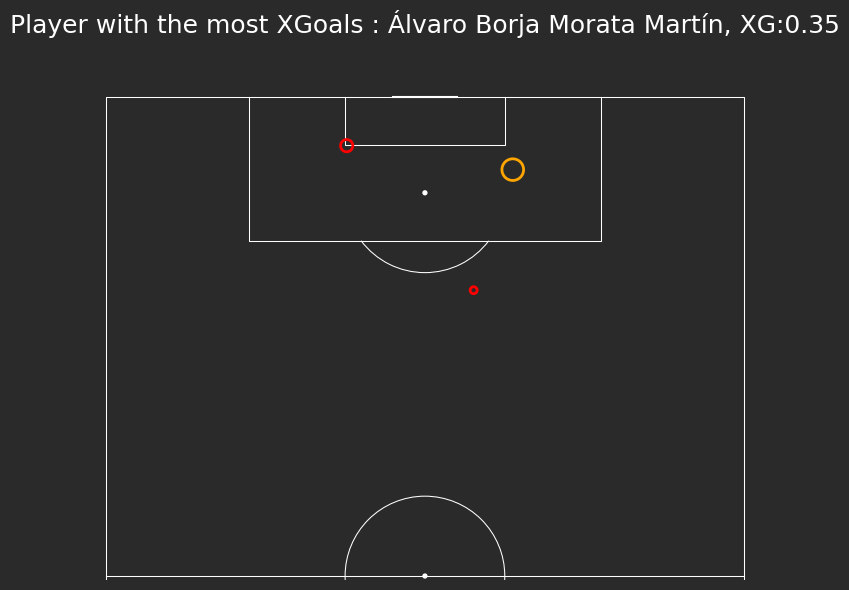

In [24]:
# Set up the pitch (without orientation) with a background color that matches the pitch
pitch_color = '#2a2a2a'  # Same color as the pitch
line_color = '#c7d5cc'   # Pitch lines color
pitch = VerticalPitch(
    pitch_type='statsbomb', 
    half=True, 
    pitch_color='#2a2a2a', 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

# Create the figure and axis
fig, ax = pitch.draw(figsize=(10, 6))  # Adjust the figsize as needed

# Loop over each shot to plot the bubbles with the required conditions
for i in range(len(most_shots_player)):
    x, y = most_shots_player.x[i], most_shots_player.y[i]
    outcome = most_shots_player.shot_outcome[i]
    size = 300 if outcome == 'Goal' else 1000 * most_shots_player.shot_statsbomb_xg[i]
    
    if outcome == 'Goal':
        # For Goals: Full marker using football marker
        pitch.scatter(x, y, marker='football', s=size, ax=ax)
    else:
        # For other outcomes: Outline marker only
        if outcome == 'Blocked':
            color = 'red'
        elif outcome in ['Wayward', 'Off T']:
            color = 'orange'
        else:
            color = 'magenta'
        
        # Plot without filling the inside, only outline
        pitch.scatter(x, y, edgecolors=color, facecolors='none', linewidth=2, s=size, ax=ax)

# Set title
ax.set_title(f"Player with the most XGoals : {str(most_xg['player'].iloc[0])}, XG:{round(sum(most_shots_player.shot_statsbomb_xg),2)}", 
             size=18, color='white')
ax.set_axis_off()
# Set the background color of the figure to match the pitch
fig.patch.set_facecolor(pitch_color)

# Display the plot
plt.show()

In [25]:
match.to_clipboard()

# Actions with the Ball

In [45]:
actions = match[match.type.isin(['Carry','Dribble','Shot'])]

In [46]:
most_actions = pd.DataFrame(actions.groupby('player')['type'].count().sort_values(ascending=False))
most_actions = most_actions.reset_index() 
most_actions

,player,type
0,Robin Aime Robert Le Normand,75
1,Aymeric Laporte,72
2,Fabián Ruiz Peña,62
3,Nicholas Williams Arthuer,53
4,Daniel Carvajal Ramos,52
5,Declan Rice,39
6,Lamine Yamal Nasraoui Ebana,39
7,Jude Bellingham,38
8,Daniel Olmo Carvajal,35
9,Kyle Walker,35


# Most Passes

In [61]:
passes = match[match.type.isin(['Pass'])]

In [62]:
most_passes = pd.DataFrame(passes.groupby('player')['type'].count().sort_values(ascending=False))
most_passes = most_passes.reset_index() 
most_passes

,player,type
0,Robin Aime Robert Le Normand,84
1,Aymeric Laporte,83
2,Daniel Carvajal Ramos,73
3,Fabián Ruiz Peña,64
4,Nicholas Williams Arthuer,51
5,Marc Cucurella Saseta,43
6,Declan Rice,42
7,Kyle Walker,42
8,Jordan Pickford,42
9,Unai Simón Mendibil,40


# Most Passes in the Final Third

In [83]:
succ_passes = match[match['pass_outcome'].isna()]
succ_passes = succ_passes[succ_passes['type'] == 'Pass']

In [84]:
succ_passes.type.unique()

array(['Pass'], dtype=object)

In [85]:
pass_loc = succ_passes['location']
pass_loc = pd.DataFrame(pass_loc.to_list(), columns=['x', 'y'])
succ_passes_end_loc = succ_passes['pass_end_location']
 = pd.DataFrame(succ_passes_end_loc.to_list(), columns=['end_x', 'end_y'])
pass_end_loc

,end_x,end_y
0,25.4,38.8
1,9.1,57.2
2,20.6,75.8
3,50.2,68.5
4,70.4,73.3
...,...,...
767,109.5,44.1
768,13.6,25.6
769,79.8,74.7
770,46.2,37.7


In [86]:
succ_passes = succ_passes.reset_index()
succ_passes['x'] = pass_loc['x']
succ_passes['y'] = pass_loc['y']
succ_passes['end_x'] = pass_end_loc['end_x']
succ_passes['end_y'] = pass_end_loc['end_y']
succ_passes

,level_0,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x,y,end_x,end_y
0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.529454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152820f0-6ca9-4df3-943b-a67d568ff472,5,NaN,NaN,"[60.0, 40.0]",3943043,0,NaN,NaN,NaN,-3.106924,NaN,Right Foot,NaN,NaN,"[25.4, 38.8]",NaN,Ground Pass,NaN,34.620804,NaN,NaN,NaN,Jordan Pickford,3468.0,NaN,NaN,NaN,NaN,Kick Off,1,From Kick Off,Kobbie Mainoo,99174.0,Right Defensive Midfield,2,England,768,[d64668c7-747c-4a7d-912c-e1c3ff357a67],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.340,Pass,NaN,60.0,40.0,25.4,38.8
1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.217978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238f44cb-0f18-4217-85b5-8cc6345278fe,10,NaN,NaN,"[6.9, 39.6]",3943043,0,NaN,NaN,NaN,1.446441,NaN,Left Foot,NaN,NaN,"[9.1, 57.2]",NaN,Ground Pass,NaN,17.736967,NaN,NaN,NaN,Robin Aime Robert Le Normand,22128.0,NaN,NaN,NaN,NaN,Goal Kick,1,From Goal Kick,Unai Simón Mendibil,11748.0,Goalkeeper,3,Spain,772,[00b729e2-1d98-4bc2-b763-3a8f4f7f1daf],34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:34.440,Pass,NaN,6.9,39.6,9.1,57.2
2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660f4d9e-9ae4-4a8c-9f44-acdbc0a04e8c,13,NaN,NaN,"[8.9, 57.2]",3943043,0,NaN,NaN,NaN,1.009303,NaN,Right Foot,NaN,NaN,"[20.6, 75.8]",NaN,Ground Pass,NaN,21.973848,NaN,NaN,NaN,Daniel Carvajal Ramos,5721.0,NaN,NaN,NaN,NaN,NaN,1,From Goal Kick,Robin Aime Robert Le Normand,22128.0,Right Center Back,3,Spain,772,[55276290-a4be-4d29-972d-a996549a9641],36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:36.279,Pass,NaN,8.9,57.2,20.6,75.8
3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.076726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dd8cccdf-05dc-41ca-b617-8812c416d5d2,17,NaN,NaN,"[28.6, 76.4]",3943043,0,NaN,NaN,NaN,-0.350628,NaN,Right Foot,NaN,NaN,"[50.2, 68.5]",NaN,Ground Pass,NaN,22.999348,NaN,NaN,NaN,Daniel Olmo Carvajal,16532.0,NaN,NaN,NaN,NaN,NaN,1,From Goal Kick,Daniel Carvajal Ramos,5721.0,Right Back,3,Spain,772,[f43a51ca-9b72-4882-806f-49feb5e87036],39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:39.436,Pass,NaN,28.6,76.4,50.2,68.5
4,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.984324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8a1f21c9-16d7-45eb-ad1e-dd92a631517d,25,NaN,NaN,"[72.5, 80.0]",3943043,0,NaN,Na

In [125]:
passes_final3 = succ_passes[((succ_passes.type=="Pass")&(succ_passes.x<90)&(succ_passes.end_x>90)&(succ_passes.pass_outcome.isna()))]

In [126]:
most_passes_final3 = pd.DataFrame(passes_final3.groupby('player')['type'].count().sort_values(ascending=False))
most_passes_final3 = most_passes_final3.reset_index() 
most_passes_final3

,player,type
0,Fabián Ruiz Peña,9
1,Aymeric Laporte,6
2,Daniel Carvajal Ramos,6
3,Lamine Yamal Nasraoui Ebana,5
4,Kyle Walker,4
5,Daniel Olmo Carvajal,4
6,Martín Zubimendi Ibáñez,4
7,Cole Palmer,2
8,Harry Kane,2
9,Declan Rice,2


In [127]:
str(most_passes_final3.player[0])

'Fabián Ruiz Peña'

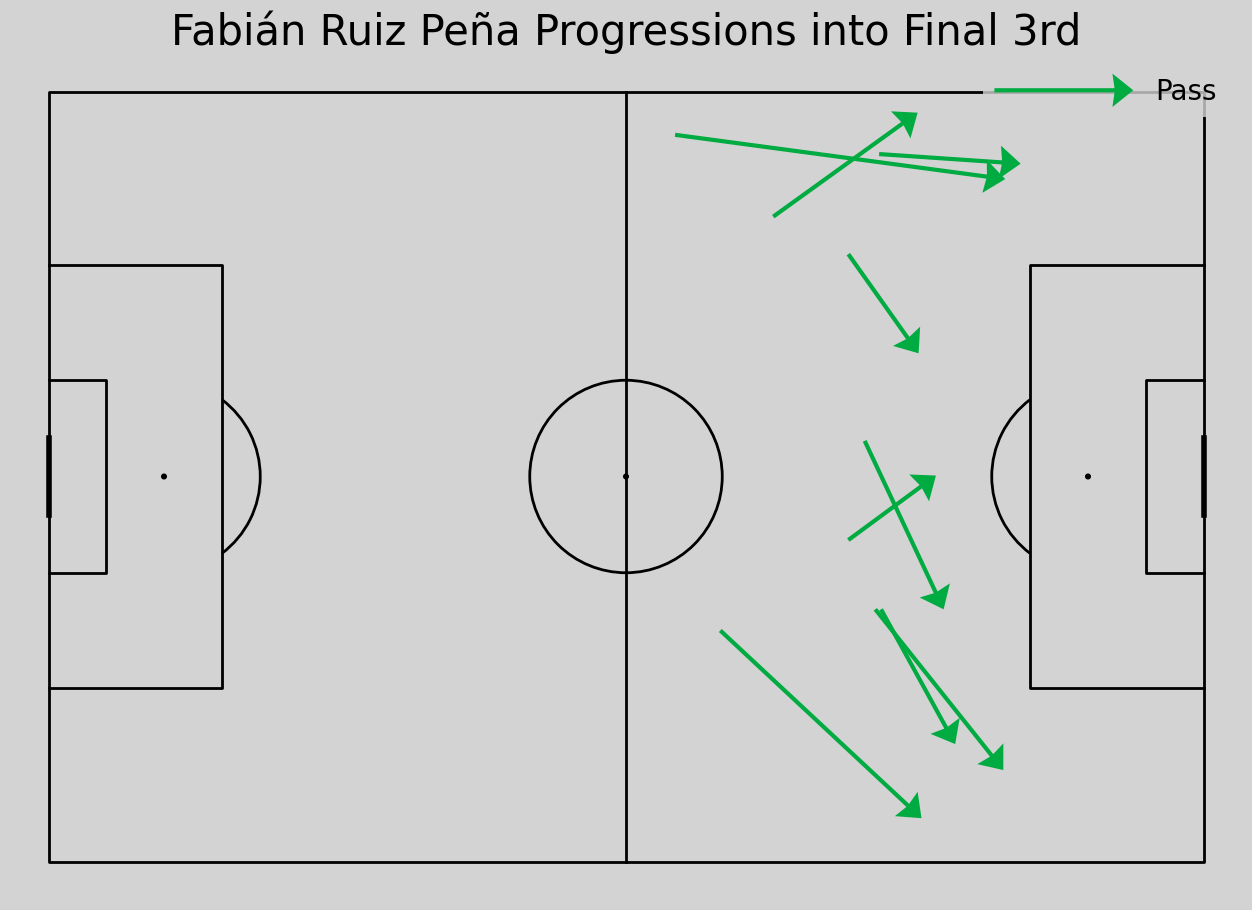

In [129]:
#Visualize for a given player

player_name=str(most_passes_final3.player[0])

player_passes=succ_passes[((succ_passes.player==player_name)&(succ_passes.type=="Pass")&(succ_passes.x<90)&(succ_passes.end_x>90)&(succ_passes.pass_outcome.isna()))]

pass_colour='#00ab41'

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#D3D3D3', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('#D3D3D3')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.end_x, player_passes.end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the legend
ax.legend(facecolor='#D3D3D3', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd', fontsize=30,color='black')